In [1]:
import os
import h5py 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

### set path to pull data from lims & separate directory for saving figures

Rbp4-Cre_KL100;Camk2a-tTA;Ai93-328341   
VISal   
375   
2017-09-06 

In [2]:
mouse_id = 328341

In [3]:
ophys_session_dir = r"\\allen\programs\braintv\production\neuralcoding\prod0\specimen_594684843\ophys_session_616863512"

In [4]:
analysis_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\BehaviorImaging\DoC\2P6_data_analysis'

### get dataset object

In [5]:
from visual_behavior_ophys.dataset.visual_behavior_scientifica_dataset import VisualBehaviorScientificaDataset

In [6]:
dataset= VisualBehaviorScientificaDataset(ophys_session_dir, mouse_id, analysis_dir = analysis_dir)

Visual frames detected in sync: 215791
2P frames detected in sync: 111614
170906
visual frames in pkl file: 215791
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M328341\output\170906135057-task=DoC_NaturalImages_Ophys_SessionE_stage=natural_images_ophys_session_E_mouse=M328341.pkl
stim type is  images


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\dataset\visual_behavior_scientifica_dataset.py:189: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  running_speed_cm_per_sec = pd.rolling_mean(running_speed_cm_per_sec, window=6)


filter edge cells = True
length of traces: 111608
number of segmented cells: 91


### look at things available in dataset object

In [8]:
cell = 17

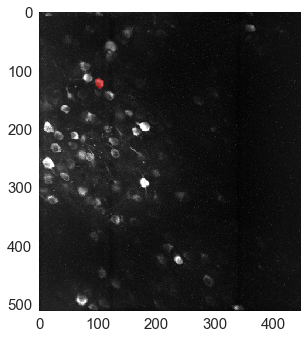

In [9]:
plt.imshow(dataset.max_projection,cmap='gray',vmax=np.amax(dataset.max_projection)/2.)
roi_mask = dataset.roi_mask_array[cell]
roi_mask[roi_mask==0] = np.nan
plt.imshow(roi_mask,cmap='hsv',alpha=0.5)
plt.grid(False)

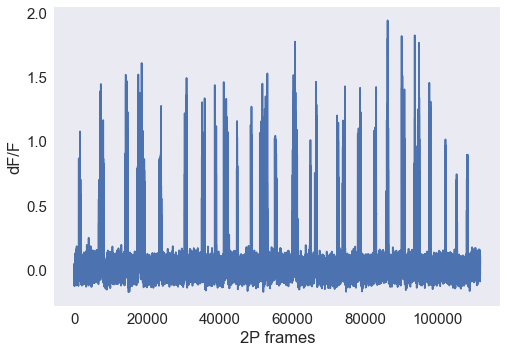

In [10]:
plt.plot(dataset.dff_traces[cell])
plt.ylabel('dF/F')
plt.xlabel('2P frames')

(152000, 155000)

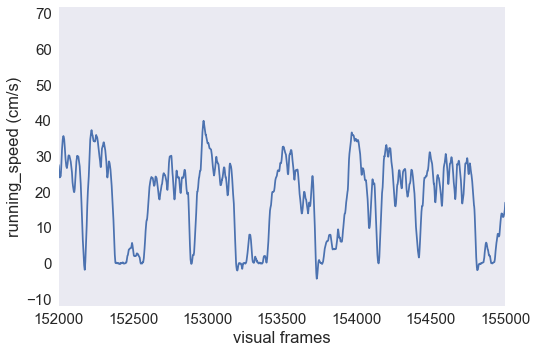

In [11]:
plt.plot(dataset.running_speed)
plt.ylabel('running_speed (cm/s)')
plt.xlabel('visual frames')
plt.xlim(152000,155000)

In [12]:
dataset.sync

{'2PFrames': {'timestamps': array([  267.15308,   267.18539,   267.21769, ...,  3874.60989,
          3874.64221,  3874.67454])},
 'cam1_exposure': {'timestamps': array([  5.55780000e-01,   5.92870000e-01,   6.01860000e-01, ...,
           3.87551136e+03,   3.87554747e+03,   3.87557881e+03])},
 'cam2_exposure': {'timestamps': array([  4.90080000e-01,   5.13300000e-01,   5.24180000e-01, ...,
           3.87490192e+03,   3.87493814e+03,   3.87496985e+03])},
 'lickTimes_0': {'timestamps': array([  268.06126,   268.30154,   275.16776, ...,  3873.09028,
          3873.24192,  3873.57737])},
 'stim_photodiode': {'timestamps': array([  275.62294,   277.62457,   279.6262 , ...,  3869.02561,
          3871.02725,  3873.02889])},
 'trigger': {'timestamps': array([ 264.5689])},
 'visualFrames': {'timestamps': array([  274.59872,   274.61532,   274.632  , ...,  3874.47343,
          3874.49007,  3874.50672])}}

In [13]:
dataset.stim_table.head()

,change_trial,total_trial,change_frame,change_time,initial_code,change_code,initial_image,change_image,trial_type,behavioral_response,behavioral_response_type
0,0,1,270,279.10213,5,4,im053,im046,go,0.0,MISS
1,1,3,765,287.35885,4,1,im046,im029,go,1.0,HIT
2,2,7,1890,306.12410,1,0,im029,im008,go,1.0,HIT
3,3,12,2925,323.38823,0,2,im008,im037,go,1.0,HIT
4,4,15,4095,342.90420,2,3,im037,im040,go,1.0,HIT


### use plotting functions

In [14]:
from visual_behavior_ophys.plotting_tools import summary_figures as sf

C:\Anaconda\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


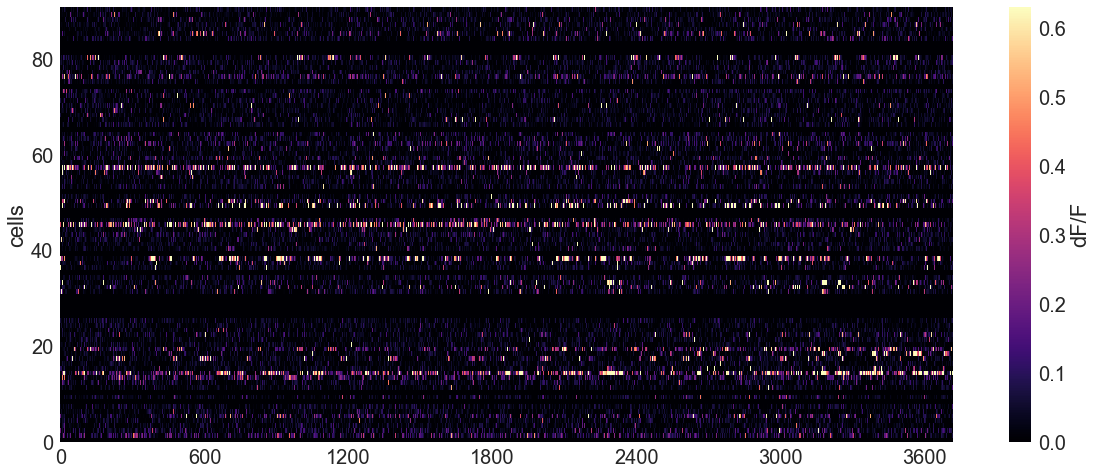

In [15]:
sf.plot_traces_heatmap(dataset, save=True, cbar=True, ax=None)

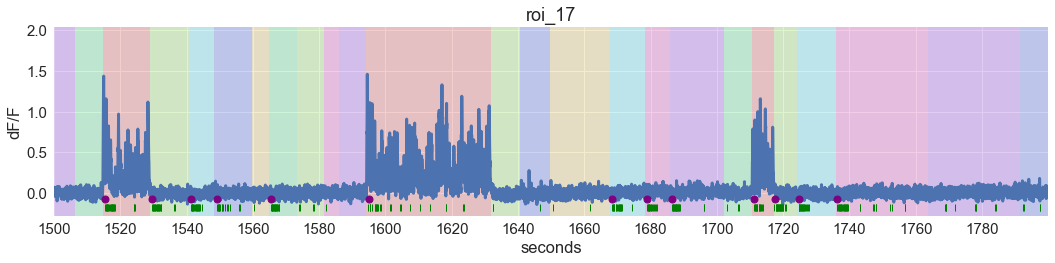

In [16]:
sf.plot_behavior_events_trace(dataset, [cell], xmin=1500, length=5, ax=None, save=False)

### generate trial by trial response dataframe

In [17]:
from visual_behavior_ophys.response_analysis.response_analysis import ResponseAnalysis 

In [23]:
ra = ResponseAnalysis(dataset)

length of traces: 111608
number of segmented cells: 91
loading response dataframe
done


In [28]:
ra.response_df.head()

,cell,trial,response,response_timestamps,response_window_mean,baseline_window_mean,p_value,sd_over_baseline,run_speed,run_timestamps,...,total_trial,change_frame,change_time,initial_code,change_code,initial_image,change_image,trial_type,behavioral_response,behavioral_response_type
0,0,0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[275.09986, 275.13216, 275.16447, 275.19677, 2...",NaN,NaN,NaN,NaN,"[4.61856274914, 3.33553617778, 2.26535503088, ...","[275.09884, 275.11551, 275.13221, 275.14888, 2...",...,1,270,279.10213,5,4,im053,im046,go,0.0,MISS
1,1,0,"[0.0183447685642, 0.00349681020621, 0.05151183...","[275.09986, 275.13216, 275.16447, 275.19677, 2...",0.051727,0.094046,0.083404,0.754154,"[4.61856274914, 3.33553617778, 2.26535503088, ...","[275.09884, 275.11551, 275.13221, 275.14888, 2...",...,1,270,279.10213,5,4,im053,im046,go,0.0,MISS
2,2,0,"[0.0168263771673, -0.0345859013572, -0.1120739...","[275.09986, 275.13216, 275.16447, 275.19677, 2...",0.010801,0.021177,0.615781,0.186449,"[4.61856274914, 3.33553617778, 2.26535503088, ...","[275.09884, 275.11551, 275.13221, 275.14888, 2...",...,1,270,279.10213,5,4,im053,im046,go,0.0,MISS
3,3,0,"[0.0806275930679, 0.115063670447, -0.022889047...","[275.09986, 275.13216, 275.16447, 275.19677, 2...",0.014464,0.042103,0.087518,0.346954,"[4.61856274914, 3.33553617778, 2.26535503088, ...","[275.09884, 275.11551, 275.13221, 275.14888, 2...",...,1,270,279.10213,5,4,im053,im046,go,0.0,MISS
4,4,0,"[-0.106585423796, -0.00364537316367, 0.0838125...","[275.09986, 275.13216, 275.16447, 275.19677, 2...",0.003253,0.033817,0.149269,0.054259,"[4.61856274914, 3.33553617778, 2.26535503088, ...","[275.09884, 275.11551, 275.13221, 275.14888, 2...",...,1,270,279.10213,5,4,im053,im046,go,0.0,MISS


In [53]:
ra.response_df.keys()

Index([u'cell', u'trial', u'response', u'response_timestamps',
       u'response_window_mean', u'baseline_window_mean', u'p_value',
       u'sd_over_baseline', u'run_speed', u'run_timestamps', u'mean_run_speed',
       u'change_trial', u'lick_times', u'reward_rate', u'total_trial',
       u'change_frame', u'change_time', u'initial_code', u'change_code',
       u'initial_image', u'change_image', u'trial_type',
       u'behavioral_response', u'behavioral_response_type'],
      dtype='object')

### plot response for all trials, locked to change time

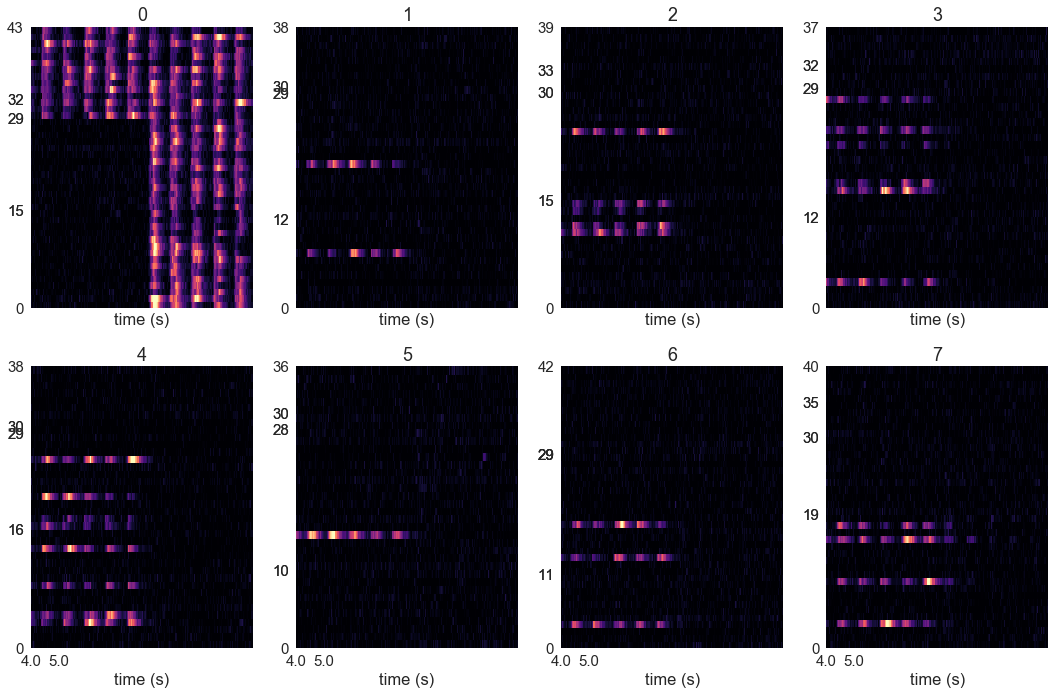

In [47]:
sf.plot_transition_type_heatmap(ra, [cell], vmax=np.percentile(dataset.dff_traces[cell, :], 99.9), ax=None, cmap='magma', colorbar=False);

### identify cell's preferred image

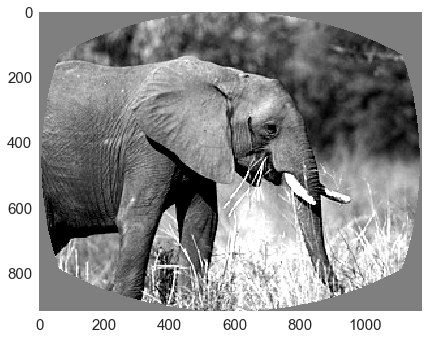

In [41]:
image_name = dataset.stim_codes[dataset.stim_codes.stim_code==0].image_name.values[0]
plt.imshow(dataset.pkl['image_dict'][image_name][image_name],cmap='gray')
plt.grid(False)